<a href="https://colab.research.google.com/github/Karson-Fye/ml-project-jkk/blob/main/Flask_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Cleaned Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
import pickle
import os
from google.colab import drive

In [ ]:
!pwd
# Mounting your personal drive so we can use the csv file in our 'Code' folder
drive.mount('/content/drive')
!pwd
%cd '/content/drive/My Drive/Titanic_Code'
%ls

/content
Mounted at /content/drive
/content
/content/drive/.shortcut-targets-by-id/1p_u-zdHfsa5va4UhToJTuJdqJvzytZSN/Titanic_Code
classifer.pkl  Flask_Classifier.ipynb  survived.csv  Titanic.ipynb
features.csv   mydecisiontree.png      titanic.csv


In [ ]:
X = pd.read_csv('features.csv')
y = pd.read_csv('survived.csv')

In [ ]:
X.head()

,sex,pclass,fare,embarked,parch,age,ticket
0,0,1,211.3375,2,0,29,24160
1,1,1,151.5500,2,2,1,113781
2,0,1,151.5500,2,2,2,113781
3,1,1,151.5500,2,2,30,113781
4,0,1,151.5500,2,2,25,113781


In [ ]:
y.head()

,survived
0,1
1,1
2,0
3,0
4,0


# Testing RF Classifier

## Training / Testing Sizes

In [ ]:
sizes = []
accuracy = []
for i in range(15,40,1):
  X_train, X_test, y_train, y_test = train_test_split(
      X,y,test_size=i/100, random_state=1)
  # Now, splitting into classification labels and data

  # Here is where we test the classifier accuracy
  rf = RandomForestClassifier(random_state=0)
  rf.fit(X_train , y_train.values.ravel())
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  sizes.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i*100,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
#tsize = sizes[spot]/100
tsize = 0.2
print('Testing Size ' , str(sizes[spot])+'%', '\nAccuracy', display[spot])

Testing Size  24% 
Accuracy 83.6%


In [ ]:
print(tsize)
X_train, X_test, y_train, y_test = train_test_split(
      X,y,test_size=tsize, random_state=1)
y_train = y_train.values.ravel()

0.2


## N-Estimators


In [ ]:
n_vals = []
accuracy = []
for i in range(1,200, 1):
  rf = RandomForestClassifier(random_state=0, n_estimators=i)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  n_vals.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,10))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
n_val = n_vals[spot]
print('N Value ' , n_val, '\nAccuracy', display[spot])

N Value  8 
Accuracy 0.8509615385%


## Max Depth

In [ ]:
depths = []
accuracy = []
for i in range(1,50, 1):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=i)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  depths.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
depth = depths[spot]
print('N Value ' , depth, '\nAccuracy', display[spot])

N Value  12 
Accuracy 0.8163%


## Sample Split

In [ ]:
splits = []
accuracy = []
for i in range(2,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=i)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  splits.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
split = splits[spot]
print('N Value ' , split, '\nAccuracy', display[spot])

N Value  2 
Accuracy 0.8163%


## Leaf Size

In [ ]:
leaves = []
accuracy = []
for i in range(1,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=i)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  leaves.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
leaf = leaves[spot]
print('Leaf Size ' , leaf, '\nAccuracy', display[spot])

Leaf Size  1 
Accuracy 0.8163%


## Fraction Leaf

In [ ]:
fractions = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  fractions.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
fraction = fractions[spot]/100
print('Fraction Val ' , fraction, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


## Impurity Split

In [ ]:
threshs = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=fraction, 
                              min_impurity_decrease=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  threshs.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
thresh = threshs[spot]/100
print('Fraction Val ' , thresh, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


# Testing XGBoost

## Eta Edits

In [ ]:
threshs = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=fraction, 
                              min_impurity_decrease=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  threshs.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
thresh = threshs[spot]/100
print('Fraction Val ' , thresh, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


## Max_depth Edits

In [ ]:
threshs = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=fraction, 
                              min_impurity_decrease=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  threshs.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
thresh = threshs[spot]/100
print('Fraction Val ' , thresh, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


## Objective Edits

In [ ]:
threshs = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=fraction, 
                              min_impurity_decrease=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  threshs.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
thresh = threshs[spot]/100
print('Fraction Val ' , thresh, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


## Num_class Edits

In [ ]:
threshs = []
accuracy = []
for i in range(0,50):
  rf = RandomForestClassifier(random_state=0, 
                              n_estimators=n_val, max_depth=depth,
                              min_samples_split=split, min_samples_leaf=leaf,
                              min_weight_fraction_leaf=fraction, 
                              min_impurity_decrease=i/100)
  rf.fit(X_train , y_train)
  rf_pred = rf.predict(X_test)

  # Append arrays with information
  threshs.append(i)
  accuracy.append(metrics.accuracy_score(rf_pred, y_test))

In [ ]:
display = [str(round(i,4))+'%' for i in accuracy]
spot = accuracy.index(np.max(accuracy))
thresh = threshs[spot]/100
print('Fraction Val ' , thresh, '\nAccuracy', display[spot])

Fraction Val  0.0 
Accuracy 0.8163%


## Training Iteration Edits

In [ ]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

param = {
    'eta': 0.3, 
    'max_depth': 6,  
    'objective': 'reg:logistic'} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

xg_final = accuracy_score(y_test, best_preds)

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.2956730769230769
Recall = 0.5
Accuracy = 0.5913461538461539


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
preds

array([0.08061495, 0.03024128, 0.03226415, 0.70969594, 0.22151387,
       0.4207317 , 0.07053449, 0.03910039, 0.2443737 , 0.09634675,
       0.10174631, 0.05000198, 0.9216482 , 0.06037312, 0.8987979 ,
       0.19144905, 0.48080468, 0.07306015, 0.9730934 , 0.16811872,
       0.96415687, 0.09855471, 0.9459216 , 0.9391655 , 0.57250994,
       0.5295158 , 0.9137533 , 0.5698004 , 0.12650025, 0.400635  ,
       0.10401963, 0.9758394 , 0.956137  , 0.9794281 , 0.9695739 ,
       0.7482551 , 0.5790004 , 0.97406197, 0.8309168 , 0.8755727 ,
       0.9216482 , 0.03920949, 0.7145363 , 0.7016361 , 0.08209877,
       0.7687737 , 0.953741  , 0.8701632 , 0.08731835, 0.6638913 ,
       0.960649  , 0.1905407 , 0.08198421, 0.20516717, 0.12375433,
       0.09277873, 0.4431402 , 0.36752453, 0.9398458 , 0.3659111 ,
       0.5550196 , 0.09753007, 0.08276688, 0.04919836, 0.29162672,
       0.9521177 , 0.566973  , 0.9685489 , 0.12516674, 0.11198585,
       0.04471939, 0.10670037, 0.2532785 , 0.11058479, 0.18075

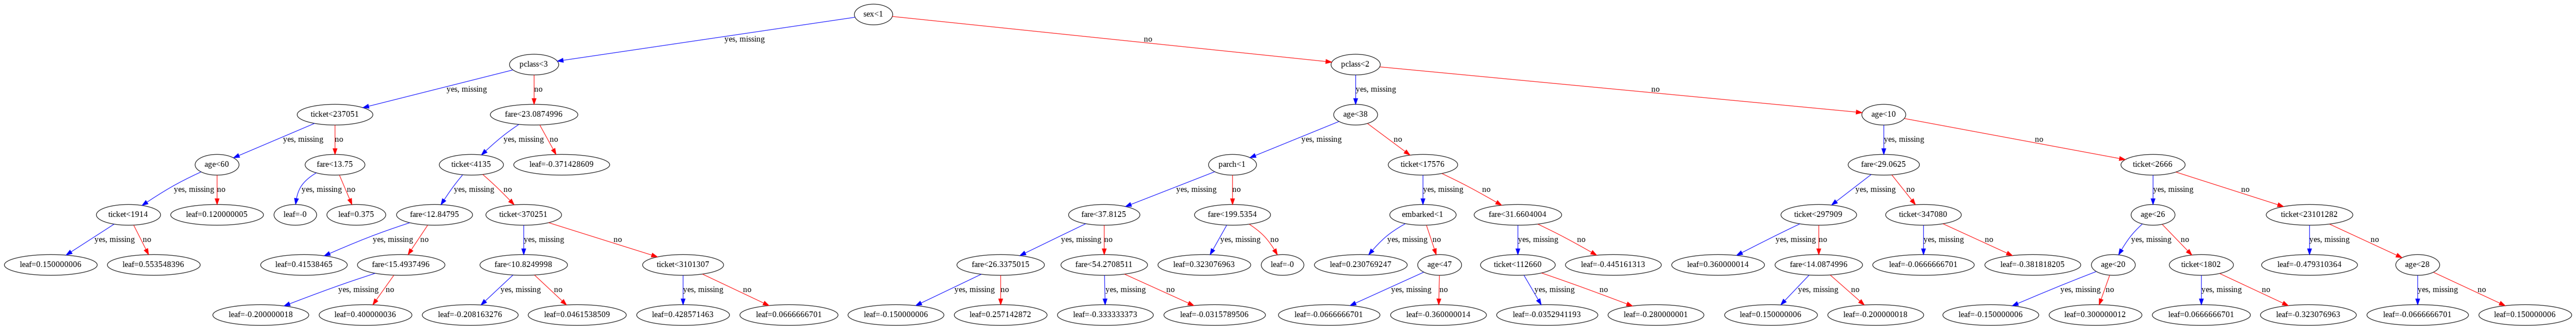

In [ ]:
xgb.plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150,100)

# Export Classifier w/ Pickle


In [ ]:
pickle.dump(rf, open('/content/drive/MyDrive/Titanic_Code/classifer.pkl','wb'))